In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
import datetime as dt
import pandas as pd

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temp_june = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [6]:
#  3. Convert the June temperatures to a list.
ls_temp_june = [temp[0] for temp in temp_june]

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_temp_june = pd.DataFrame(ls_temp_june, columns=['June Temperature'])

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_temp_june.describe()

,June Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temp_dec = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [10]:
# 7. Convert the December temperatures to a list.
ls_temp_desc = [temp[0] for temp in temp_dec]

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_temp_desc = pd.DataFrame(ls_temp_desc, columns=['December Temperature'])

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_temp_desc.describe()

,December Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Bonus

<AxesSubplot:>

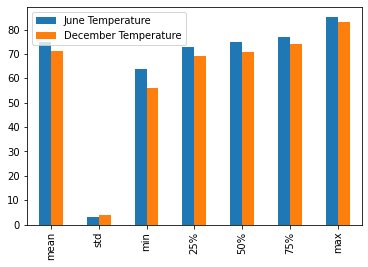

In [21]:
df_temp_compare = df_temp_june.describe().join(df_temp_desc.describe())
df_temp_compare.iloc[1:].plot(kind='bar') # filter out 'count' for better scaling